## Imports

In [72]:
import pandas as pd
from sklearn.metrics import mean_squared_error ,r2_score,accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from  scipy.stats import uniform
import numpy as np
import seaborn as sns
from sklearn.neighbors import  KNeighborsClassifier 
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler


In [78]:
vino_df=pd.read_csv("winequality-red.csv")
vino_df.columns=['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros','Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos','Alcohol','Calidad']
vino_df
vino_df['Densidad'] = vino_df['Densidad'].apply(lambda x: f"{x:,.3f}")
vino_df['Cloruros'] = vino_df['Cloruros'].apply(lambda x: f"{x:,.3f}")
vino_df

X = vino_df[['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros','Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos','Calidad']]
y = (vino_df['Alcohol']*100).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo = LinearRegression()

modelo.fit(X_train,y_train)

prediccionesLinear = modelo.predict(X_test)
mse_lineal = mean_squared_error(y_test, prediccionesLinear)
r2_lineal = r2_score(y_test,prediccionesLinear)

print(f"Regresión Lineal - MSE: {mse_lineal:.2f}")
print(f"Regresión Lineal - R²: {r2_lineal:.2f}")

scaler = StandardScaler()

scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 


clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)


clf.fit(X_train,y_train)

SGDClassifier(max_iter=5)



Regresión Lineal - MSE: 3315.95
Regresión Lineal - R²: 0.72


c:\Users\ralphy.nunezmercado\Documents\Directorio\InteligenciaArtificial\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

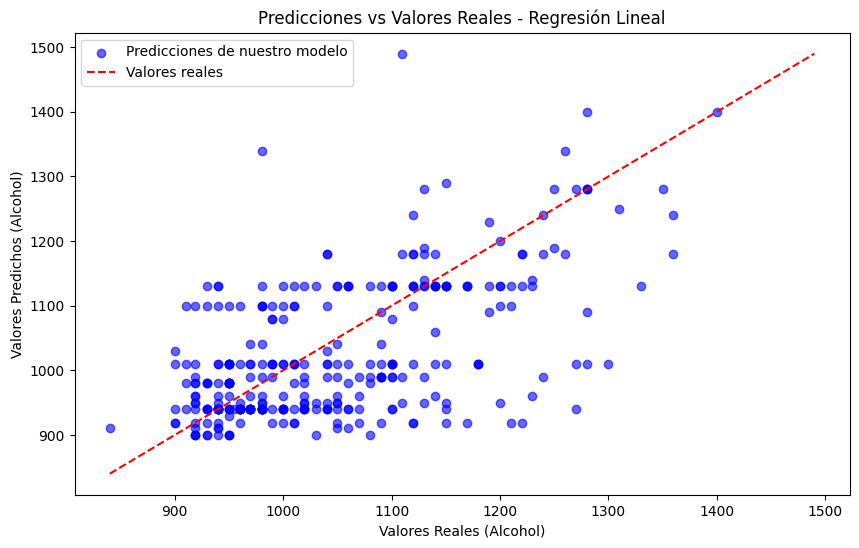

In [79]:
rseyfrttgyuihyuki = clf.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rseyfrttgyuihyuki, color='blue', alpha=0.6, label='Predicciones de nuestro modelo')
limites = np.array([min(y_test.min(), rseyfrttgyuihyuki.min()), max(y_test.max(), rseyfrttgyuihyuki.max())])
plt.plot(limites, limites, color='red', linestyle='--', label='Valores reales')
plt.title('Predicciones vs Valores Reales - Regresión Lineal')
plt.xlabel('Valores Reales (Alcohol)')
plt.ylabel('Valores Predichos (Alcohol)')
plt.legend()
plt.show()